In [3]:
# Download the data
!wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE102nnn/GSE102569/suppl/GSE102569%5Fall%5FFPKM.txt.gz
!gunzip GSE102569_all_FPKM.txt.gz

--2024-06-12 10:32:47--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE102nnn/GSE102569/suppl/GSE102569%5Fall%5FFPKM.txt.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 130.14.250.13, 2607:f220:41e:250::7, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473301 (462K) [application/x-gzip]
Saving to: ‘GSE102569_all_FPKM.txt.gz’

GSE102569_all_FPKM. 100%[===================>] 462.21K   969KB/s    in 0.5s    

2024-06-12 10:32:49 (969 KB/s) - ‘GSE102569_all_FPKM.txt.gz’ saved [473301/473301]



In [2]:
suppressMessages(library('DESeq2'))
suppressMessages(library('BiocParallel'))

In [3]:
df <- read.table("GSE102569_all_FPKM.txt", header=TRUE, sep="\t", row.names=2)
df <- df[, 2:8]

In [4]:
# R is not actually able to read this file. Switching to Python
'CG9650' %in% rownames(df)

[1] FALSE

In [3]:
# split by "_" then take the first element
condition <- sapply(strsplit(colnames(df), "_"), function(x) x[1])
sample <- colnames(df)
colData <- data.frame(condition)
rownames(colData) <- sample
colnames(colData) <- "condition"

In [31]:
dds <- DESeqDataSetFromMatrix(countData = countData,
                              colData = colData,
                              design = ~ condition)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [32]:
# keep <- rowSums(counts(dds)) >= 10  # min counts per gene
dds <- dds[keep,]

register(MulticoreParam(4))
dds <- DESeq(dds, test="LRT", minReplicatesForReplace=Inf, reduced= ~ 1)
res <- results(dds)
resOrdered <- res[order(res$pvalue),]
write.csv(as.data.frame(resOrdered), file="deseq2_results.csv")

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [ ]:
# FBgn0029939	CG9650	1.03973	1.028	1.21887	12.6172	13.1231	9.2493	16.6696

In [46]:
'CG9650' in rownames(tab)

In [5]:
# Prepare the data
data = pd.read_csv('GSE102569_all_FPKM.txt', sep='\t', index_col=1)
data.drop('gene_id', axis=1, inplace=True)
counts_df = data.T
metadata = pd.DataFrame(index=data.columns)
metadata['condition'] = metadata.index.str.split('_').str[0]

# Filter genes with low counts
genes_to_keep = counts_df.columns[counts_df.sum(axis=0) >= 10]
counts_df = counts_df[genes_to_keep]

In [7]:
# Set up the pyDESeq2 object
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=counts_df.astype(int),
    metadata=metadata,
    design_factors="condition",
    refit_cooks=True,
    inference=inference,
)

In [8]:
# Run pyDESeq2
dds.deseq2()

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 6.76 seconds.

Fitting dispersion trend curve...
... done in 4.12 seconds.

Fitting MAP dispersions...
... done in 12.53 seconds.

Fitting LFCs...
... done in 5.57 seconds.

Replacing 0 outlier genes.



In [9]:
stat_res = DeseqStats(dds, inference=inference)

In [10]:
stat_res.summary()

Running Wald tests...
... done in 1.73 seconds.



Log2 fold change & Wald test p-value: condition ScOE vs Ctrl
                    baseMean  log2FoldChange     lfcSE      stat  \
gene_short_name                                                    
a                   2.925245       -1.274322  0.915312 -1.392227   
Abl                 2.417753        0.247676  0.971115  0.255043   
abo                 6.896915       -0.448926  0.599719 -0.748561   
Acph-1             25.095476        0.559408  0.330849  1.690823   
Act5C            2870.438224       -0.747988  0.127443 -5.869204   
...                      ...             ...       ...       ...   
rump               91.931591        0.779846  0.198635  3.926026   
bl                 73.506158        0.423319  0.210207  2.013822   
rgr                20.661165       -0.436310  0.392564 -1.111436   
CR43174             2.621280       -1.031887  1.009347 -1.022331   
CG32138            29.173007       -1.342221  0.366523 -3.662043   

                       pvalue          padj  
gene_sho

In [42]:
stat_res.lfc_shrink(coeff="condition_ScOE_vs_Ctrl")

Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: condition ScOE vs Ctrl
                    baseMean  log2FoldChange     lfcSE      stat  \
gene_short_name                                                    
a                   2.925245       -0.408479  0.696167 -1.392166   
Abl                 2.417753        0.060599  0.640593  0.255032   
abo                 6.896915       -0.212418  0.495513 -0.748523   
Acph-1             25.095476        0.439084  0.321851  1.690695   
Act5C            2870.438224       -0.725579  0.127220 -5.867899   
...                      ...             ...       ...       ...   
rump               91.931591        0.728513  0.198474  3.925461   
bl                 73.506158        0.378015  0.207173  2.013564   
rgr                20.661165       -0.301688  0.364734 -1.111378   
CR43174             2.621280       -0.258833  0.660605 -1.022296   
CG32138            29.173007       -1.183638  0.369694 -3.661828   

                       pvalue          padj  
g

... done in 0.69 seconds.



In [48]:
res = stat_res.results_df

In [49]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_short_name,,,,,,
a,2.925245,-0.408479,0.696167,-1.392166,1.638723e-01,NaN
Abl,2.417753,0.060599,0.640593,0.255032,7.986983e-01,NaN
abo,6.896915,-0.212418,0.495513,-0.748523,4.541445e-01,6.963560e-01
Acph-1,25.095476,0.439084,0.321851,1.690695,9.089501e-02,2.553594e-01
Act5C,2870.438224,-0.725579,0.127220,-5.867899,4.413531e-09,1.445223e-07
...,...,...,...,...,...,...
rump,91.931591,0.728513,0.198474,3.925461,8.656397e-05,9.345678e-04
bl,73.506158,0.378015,0.207173,2.013564,4.405534e-02,1.509537e-01
rgr,20.661165,-0.301688,0.364734,-1.111378,2.664059e-01,5.163097e-01


In [51]:
res.loc['CG9650']

baseMean          7.841153
log2FoldChange    3.292876
lfcSE             0.903715
stat              3.897346
pvalue            0.000097
padj              0.001034
Name: CG9650, dtype: float64

In [52]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_short_name,,,,,,
a,2.925245,-0.408479,0.696167,-1.392166,1.638723e-01,NaN
Abl,2.417753,0.060599,0.640593,0.255032,7.986983e-01,NaN
abo,6.896915,-0.212418,0.495513,-0.748523,4.541445e-01,6.963560e-01
Acph-1,25.095476,0.439084,0.321851,1.690695,9.089501e-02,2.553594e-01
Act5C,2870.438224,-0.725579,0.127220,-5.867899,4.413531e-09,1.445223e-07
...,...,...,...,...,...,...
rump,91.931591,0.728513,0.198474,3.925461,8.656397e-05,9.345678e-04
bl,73.506158,0.378015,0.207173,2.013564,4.405534e-02,1.509537e-01
rgr,20.661165,-0.301688,0.364734,-1.111378,2.664059e-01,5.163097e-01


In [63]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as pl

In [64]:
res['score'] = -np.log10(res['pvalue'])

0.0010338850898068712

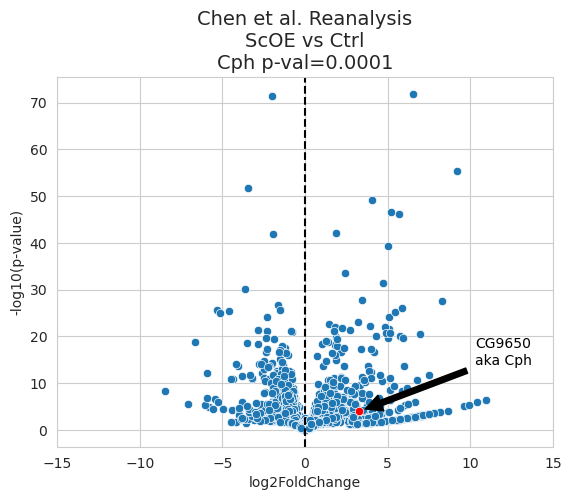

In [95]:
with sns.axes_style('whitegrid'):
    sns.scatterplot(data=res, y='score', x='log2FoldChange')
pv = np.round(res.loc['CG9650']['pvalue'], 5)
pl.title(f"Chen et al. Reanalysis\nScOE vs Ctrl\nCph p-val={pv}", fontdict=dict(fontsize=14))
pl.axvline(0, color='black', linestyle='--')
pl.xlim(-15, 15)
pl.ylabel('-log10(p-value)')
sns.scatterplot(data=res.loc[['CG9650']], y='score', x='log2FoldChange', ax=pl.gca(), color='red')
x,y = res.loc['CG9650'][['log2FoldChange', 'score']]
pl.annotate('CG9650\naka Cph', (x,y), xytext=(x+7, y+10), arrowprops=dict(facecolor='black', shrink=0.05))

pl.show()

In [90]:
res.loc['CG9650']

baseMean          7.841153
log2FoldChange    3.292876
lfcSE             0.903715
stat              3.897346
pvalue            0.000097
padj              0.001034
score             4.012099
Name: CG9650, dtype: float64